In [1]:
import numpy as np

In [2]:
dataset_name = '../data/domain_names_full.txt'
dataset = open(dataset_name, 'r').read().split()

In [3]:
len(dataset)

4345850

In [4]:
min(len(x) for x in dataset)

4

In [5]:
np.argmax([len(x) for x in dataset])

19484

In [6]:
dataset[19484]

'xn-----0b4asja7ccgu2b4b0gd0edbjm2jpa1b1e9zva7a0347s4da2797e8qri.xn--1ck2e1b'

In [7]:
for d in dataset[:10]:
    for c1, c2 in zip(d, d[1:]):
        print(c1,c2)

g o
o o
o g
g l
l e
e .
. c
c o
o m
a -
- m
m s
s e
e d
d g
g e
e .
. n
n e
e t
m i
i c
c r
r o
o s
s o
o f
f t
t .
. c
c o
o m
f a
a c
c e
e b
b o
o o
o k
k .
. c
c o
o m
a m
m a
a z
z o
o n
n a
a w
w s
s .
. c
c o
o m
g o
o o
o g
g l
l e
e a
a p
p i
i s
s .
. c
c o
o m
a p
p p
p l
l e
e .
. c
c o
o m
y o
o u
u t
t u
u b
b e
e .
. c
c o
o m
r o
o o
o t
t -
- s
s e
e r
r v
v e
e r
r s
s .
. n
n e
e t
a k
k a
a m
m a
a i
i .
. n
n e
e t


In [8]:
'*' in set([y for x in dataset for y in x])

False

In [9]:
# print the bigrams for each example
for d in dataset[:1]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        print(c1,c2)

* g
g o
o o
o g
g l
l e
e .
. c
c o
o m
m *


In [10]:
# This step is expensive... 
bigrams = dict()
for d in dataset:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        bigrams[(c1, c2)] = bigrams.get((c1,c2), 0) + 1

In [11]:
len(bigrams.keys())

1500

In [12]:
charset = ['*'] + sorted(list(set([y for x in dataset for y in x])))
ctoi = {c:i for i, c in enumerate(charset)}
itoc = {i:c for i, c in enumerate(charset)}

In [13]:
ctoi['c']

16

In [14]:
import numpy as np
bigram_count = np.zeros((5, 3, 4))

In [15]:
bigram_count = np.zeros((len(charset), len(charset))).astype(int)

In [16]:
bigram_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
for d in dataset:  # <== remove [:10] to run for all examples
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        bigram_count[ctoi[c1], ctoi[c2]] += 1

In [18]:
bigram_count

array([[     0,      2,      0, ...,  52485,  53384,  55244],
       [     0,  31226,      2, ...,   6031,   4517,   7787],
       [     0,      0,      0, ...,  72016,    529,  10540],
       ...,
       [ 12941,  12622,  74637, ...,  17950,  72483,   3644],
       [ 22402,  23564, 172837, ...,   5031,   7042,  68705],
       [132325,   5796,  40737, ...,   5103,   9968,  35271]])

(-0.5, 39.5, 39.5, -0.5)

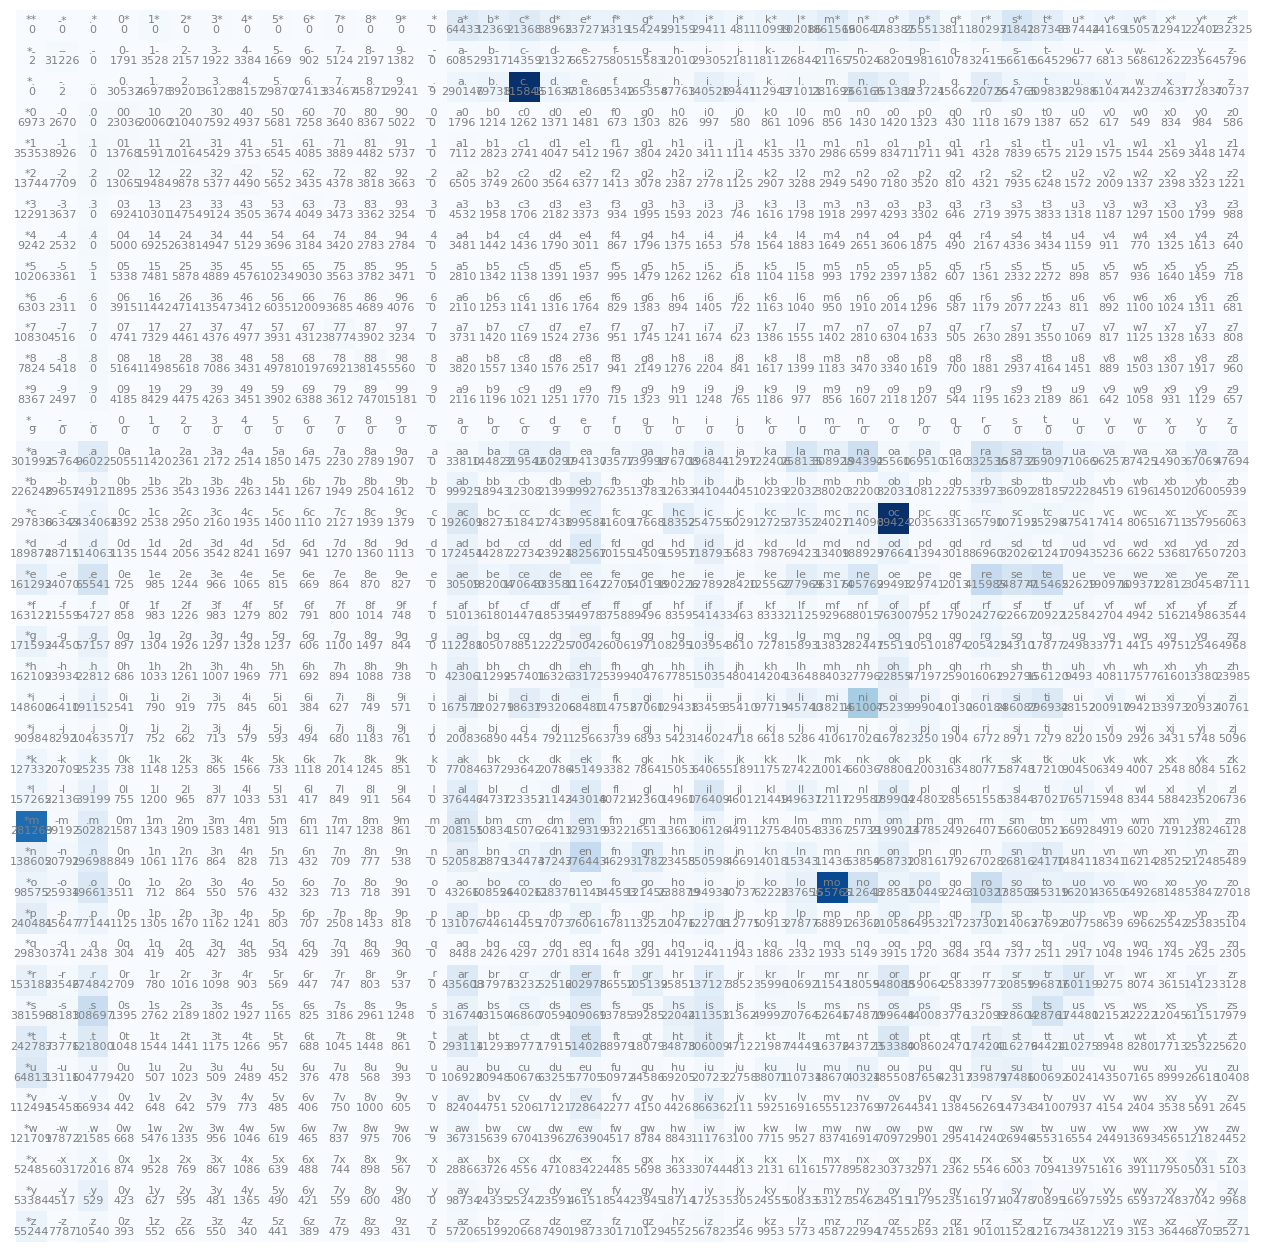

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_count, cmap='Blues')
for i in range(len(charset)):
    for j in range(len(charset)):
        chars = itoc[i]+itoc[j]
        plt.text(i, j, chars,ha='center', va='bottom', color='grey', fontsize=8)
        plt.text(i, j, bigram_count[i,j],ha='center', va='top', color='grey', fontsize=8)
plt.axis('off')

In [20]:
p = bigram_count[0]
p = p/p.sum()

In [21]:
np.random.seed(42)

In [22]:
draw = np.random.choice(charset, 1, p=p, replace=True)

In [23]:
draw

array(['g'], dtype='<U1')

In [24]:
p.sum()

1.0

In [25]:
def generate(bigram_count):
    new = []
    p = bigram_count[0]
    p = p/p.sum()
    draw = np.random.choice(charset, 1, p=p, replace=True)[0]
    while draw != '*':
        p = bigram_count[ctoi[draw]]
        p = p/p.sum()
        draw = np.random.choice(charset, 1, p=p, replace=True)[0]
        new.append(draw)
    return ''.join(new[:-1])

In [26]:
for _ in range(10):
    print(generate(bigram_count))

om
atio
x.chenediclemeang
a.uxxb676.c.sareng.viusit
ajifredico.xu.asoor.cbsle-deslte.meorine
.ihitalol.ceuslst.ristcaelor
ebakuconexy.cld-nf.colany.jp.nerng
ch.er
ap.jit.causartincattjilostpl.com
o


### Negative Log Likelihood
Las probabilidades que el modelo asigna a cada bigrama individual debería ser lo más cercanas a 1 posible. Para cada bigrama, si la probabilidad fuera uniforme, tendríamos una probabilidad de `1/len(charset)`. Cualquier modelo que aprenda algo asignará a algunos bigramas valores más altos de probabilidad. Si nuestro modelo fuera perfecto, asignaría probabilidad 1 a cada uno de los bigramas individuales.

In [27]:
1/len(charset)

0.025

El estimador de máxima verosimilitud (maximum likelihood estimation) se define como el producto de las probabilidades. Vamos a usar este número como indicador de cuan bueno es nuestro modelo. Así, si el estimador es 1 el modelo es perfecto. Sin embargo, noten que producto de valores entre 0 y 1 generalmente está mal condicionado numéricamente, es decir, da números muy chicos, más chicos que los límites de representación de números en punto flotante y se termina redondeando a cero. Para evitar esto se usa el logaritmo del likelihood. Además, recuerden que $$log(a*b*c) = log(a)+(log(b)+log(c)$$ 
Por lo tanto podemos calcular el log likelihood de la siguiente manera

In [28]:
bigram_prob = bigram_count/bigram_count.sum(axis=1, keepdims=True)  # Calculamos la matriz de probabilidades (en lugar de matriz de cuentas)

In [29]:
log_likelihood = 0.0
for d in dataset[:2]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        prob = bigram_prob[ctoi[c1], ctoi[c2]]
        log_likelihood += np.log(prob)
        print(f'{c1}{c2} {prob:.4f}')
print(f'{log_likelihood=:0.4f}')

*g 0.0395
go 0.0905
oo 0.0222
og 0.0130
gl 0.0316
le 0.1244
e. 0.0940
.c 0.5115
co 0.5720
om 0.3794
m* 0.5301
*a 0.0695
a- 0.0145
-m 0.0535
ms 0.0150
se 0.0814
ed 0.0397
dg 0.0141
ge 0.1045
e. 0.0940
.n 0.0624
ne 0.1793
et 0.1119
t* 0.0920
log_likelihood=-62.2402


Para hacer comparaciones entre modelos y datasets, lo mejor normalizar el (log) likelihood por la cantidad de muestras utilizada para calcularlo. Así, usamos el promedio del (log) likelihood.

In [30]:
prodprobs = 1
log_likelihood = 0.0
n = 0
for d in dataset[:2]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        prob = bigram_prob[ctoi[c1], ctoi[c2]]
        prodprobs *= prob
        log_likelihood += np.log(prob)
        n += 1
        print(f'{c1}{c2} {prob:.4f}')
print(f'{prodprobs=} <== Noten que pequeño este número')  # <== Noten que pequeño este número
print(f'{log_likelihood= :0.4f}')
print(f'Average log_likelihood: {log_likelihood/n:0.4f}')

*g 0.0395
go 0.0905
oo 0.0222
og 0.0130
gl 0.0316
le 0.1244
e. 0.0940
.c 0.5115
co 0.5720
om 0.3794
m* 0.5301
*a 0.0695
a- 0.0145
-m 0.0535
ms 0.0150
se 0.0814
ed 0.0397
dg 0.0141
ge 0.1045
e. 0.0940
.n 0.0624
ne 0.1793
et 0.1119
t* 0.0920
prodprobs=9.320347478012834e-28 <== Noten que pequeño este número
log_likelihood= -62.2402
Average log_likelihood: -2.5933


Por ultimo, vamos a usar esto como función de perdida (loss function). La semántica de la loss function indica que cuanto menor es el valor, mejor es el modelo. Por lo tanto, usamos el negative log likelihood. Como el logaritmo es una función monotónica creciente, que para las probabilidades va desde $-\infty$ hasta 0, el negativo de la función es monotónicamente descreciente desde $\infty$ hasta 0.

/tmp/ipykernel_445398/2607105287.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x), label='log(x)')
/tmp/ipykernel_445398/2607105287.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(-np.log(x), label='-log(x)')


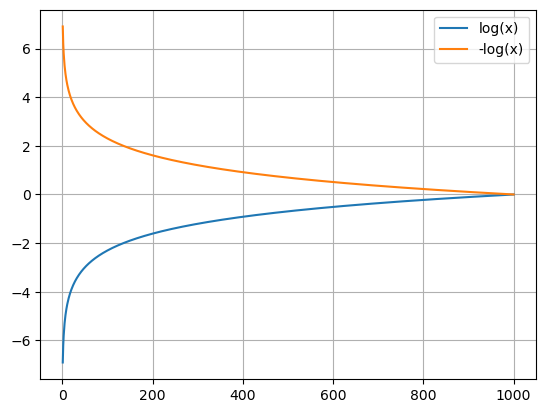

In [31]:
x = np.arange(0,1.001, 0.001)
plt.plot(np.log(x), label='log(x)')
plt.plot(-np.log(x), label='-log(x)')
plt.grid()
plt.legend()

Se cumplen entonces las siguientes equicalencias:
- Maximizar el Likelihood es equivalente a:
- Maximizar el Log Likelihood que es equivalente a:
- Maximizar el Promedio del Log Likelihood que es equivalente a:
- Minimizar el Negativo del Promedio del Log Likelihood

Por lo tanto, podemos usar el negative log likelihood promedio como función de perdida y para evaluar que tan buenos son nuestros modelos. Esta función es la misma que usaremos para entrenar desde los modelos de redes neuronales hasta los transformers.

In [32]:
def nll(s: list[str]) -> float:
    log_likelihood = 0.
    n = 0
    for d in s:
        example = ['*'] + list(d) + ['*']
        for c1, c2 in zip(example, example[1:]):
            prob = bigram_prob[ctoi[c1], ctoi[c2]]
            log_likelihood += np.log(prob)
            n += 1
            print(f'{c1}{c2} {prob:.4f} {np.log(prob):0.4f}')
    return -log_likelihood/n

In [33]:
nll(['joaquin.cmm*']) # <-- Por esto necesitamos model smoothing..

*j 0.0209 -3.8663
jo 0.1010 -2.2924
oa 0.0079 -4.8460
aq 0.0020 -6.2036
qu 0.3086 -1.1758
ui 0.0257 -3.6607
in 0.2385 -1.4334
n. 0.0788 -2.5413
.c 0.5115 -0.6705
cm 0.0035 -5.6454
mm 0.0095 -4.6563
m* 0.5301 -0.6347
** 0.0000 -inf


/tmp/ipykernel_445398/1438417475.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(prob)
/tmp/ipykernel_445398/1438417475.py:10: RuntimeWarning: divide by zero encountered in log
  print(f'{c1}{c2} {prob:.4f} {np.log(prob):0.4f}')


inf

# Model Smoothing